In [1]:
library(qvalue)
library(dplyr)
library(ggplot2)
library(cowplot)
library(LDlinkR)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [3]:
revision_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [4]:
########### Association test

In [5]:
crm_file = paste0(revision_folder,"Annas_results_all_common_eqtls_with_Bonferroni.csv")
crm = read.csv(crm_file, row.names=1)

In [6]:
nrow(crm)
head(crm,2)

[1] 5238155

,gene,n_snps,chrom,pv_raw,snpID,pv,eqtl,pv_Bonf
9552676,ENSG00000099256,1218,10,0.5397139,10_25037626_G_A,1,ENSG00000099256-10_25037626_G_A,1
9552678,ENSG00000099256,1218,10,0.5397139,10_25037863_G_A,1,ENSG00000099256-10_25037863_G_A,1


In [7]:
crm_22 = crm[crm$chrom==22,]
nrow(crm_22)

[1] 140564

In [8]:
# order 
crm_22 = crm_22[order(crm_22$pv_Bonf, crm_22$pv_raw),]
head(crm_22,2)

,gene,n_snps,chrom,pv_raw,snpID,pv,eqtl,pv_Bonf
627884,ENSG00000184674,404,22,1.706834e-20,22_24295427_C_T,6.895608e-18,ENSG00000184674-22_24295427_C_T,3.652624e-18
627891,ENSG00000184674,404,22,3.091383e-20,22_24296056_G_A,1.248919e-17,ENSG00000184674-22_24296056_G_A,3.652624e-18


In [9]:
# select a single SNP per gene
top_crm_22 = crm_22[-which(duplicated(crm_22$gene)),]
nrow(top_crm_22)
head(top_crm_22,2)

[1] 271

,gene,n_snps,chrom,pv_raw,snpID,pv,eqtl,pv_Bonf
627884,ENSG00000184674,404,22,1.706834e-20,22_24295427_C_T,6.895608e-18,ENSG00000184674-22_24295427_C_T,3.652624e-18
5971486,ENSG00000093072,766,22,2.207981e-19,22_17680519_A_C,1.691313e-16,ENSG00000093072-22_17680519_A_C,1.218805e-16


In [10]:
# FDR
top_crm_22$qv = qvalue(top_crm_22$pv_Bonf)$qvalues
nrow(top_crm_22[top_crm_22$qv<0.05,])
nrow(top_crm_22[top_crm_22$qv<0.05,])/nrow(top_crm_22)

[1] 30

[1] 0.1107011

In [11]:
########### Interaction test

In [12]:
crm_int_file = paste0(revision_folder, "CRM_interaction_chr22/results/summary.csv")
crm_int = read.csv(crm_int_file, row.names=1)
crm_int$n_snps = c()
nrow(crm_int)
head(crm_int,2)

[1] 140564

,gene,chrom,pv_raw,snpID
0,ENSG00000128159,22,0.64912024,22_50633048_T_G
1,ENSG00000128159,22,0.06923793,22_50633686_T_C


In [13]:
df_nsnps = crm_int %>% group_by(gene) %>% summarise(n_snps = n())
head(df_nsnps)

gene,n_snps
ENSG00000015475,567
ENSG00000025770,562
ENSG00000040608,454
ENSG00000054611,1584
ENSG00000056487,1222
ENSG00000069998,561


In [14]:
crm_int_nsnps = inner_join(crm_int, df_nsnps, by="gene")
nrow(crm_int_nsnps)
head(crm_int_nsnps,2)

[1] 140564

gene,chrom,pv_raw,snpID,n_snps
ENSG00000128159,22,0.64912024,22_50633048_T_G,662
ENSG00000128159,22,0.06923793,22_50633686_T_C,662


In [15]:
crm_int_nsnps$pv_Bonf = crm_int_nsnps$pv_raw * crm_int_nsnps$n_snps
crm_int_nsnps$pv_Bonf[crm_int_nsnps$pv_Bonf>1] = 1
head(crm_int_nsnps,2)

gene,chrom,pv_raw,snpID,n_snps,pv_Bonf
ENSG00000128159,22,0.64912024,22_50633048_T_G,662,1
ENSG00000128159,22,0.06923793,22_50633686_T_C,662,1


In [16]:
# order 
crm_int_nsnps = crm_int_nsnps[order(crm_int_nsnps$pv_Bonf, crm_int_nsnps$pv_raw),]
head(crm_int_nsnps,2)

,gene,chrom,pv_raw,snpID,n_snps,pv_Bonf
37562,ENSG00000100122,22,2.398976e-17,22_27002392_C_T,605,1.451381e-14
37564,ENSG00000100122,22,2.398976e-17,22_27004298_A_G,605,1.451381e-14


In [17]:
# select a single SNP per gene
top_crm_int = crm_int_nsnps[-which(duplicated(crm_int_nsnps$gene)),]
nrow(top_crm_int)
head(top_crm_int,2)

[1] 271

,gene,chrom,pv_raw,snpID,n_snps,pv_Bonf
37562,ENSG00000100122,22,2.398976e-17,22_27002392_C_T,605,1.451381e-14
122944,ENSG00000214076,22,1.621912e-14,22_32672792_A_G,778,1.261848e-11


In [18]:
# FDR
top_crm_int$qv = qvalue(top_crm_int$pv_Bonf)$qvalues
nrow(top_crm_int[top_crm_int$qv<0.05,])
nrow(top_crm_int[top_crm_int$qv<0.05,])/nrow(top_crm_22)

[1] 15

[1] 0.05535055

In [19]:
#############

In [20]:
assoc_egenes = as.character(unique(top_crm_22[top_crm_22$qv<0.05,"gene"]))
assoc_egenes

[1] "ENSG00000184674" "ENSG00000093072" "ENSG00000196236" "ENSG00000189306"
 [5] "ENSG00000100058" "ENSG00000100376" "ENSG00000215012" "ENSG00000099984"
 [9] "ENSG00000133433" "ENSG00000100299" "ENSG00000100429" "ENSG00000100417"
[13] "ENSG00000100162" "ENSG00000100410" "ENSG00000100033" "ENSG00000183628"
[17] "ENSG00000099940" "ENSG00000099977" "ENSG00000240972" "ENSG00000185838"
[21] "ENSG00000128394" "ENSG00000099974" "ENSG00000179750" "ENSG00000214076"
[25] "ENSG00000184164" "ENSG00000100344" "ENSG00000169314" "ENSG00000188130"
[29] "ENSG00000100422" "ENSG00000184076"

In [21]:
inter_egenes = as.character(unique(top_crm_int[top_crm_int$qv<0.05,"gene"]))
inter_egenes

[1] "ENSG00000100122" "ENSG00000214076" "ENSG00000099984" "ENSG00000100031"
 [5] "ENSG00000093072" "ENSG00000133433" "ENSG00000100058" "ENSG00000184674"
 [9] "ENSG00000183579" "ENSG00000100362" "ENSG00000100376" "ENSG00000179750"
[13] "ENSG00000128394" "ENSG00000189306" "ENSG00000133466"

In [22]:
length(assoc_egenes[assoc_egenes %in% inter_egenes])

[1] 10

In [23]:
assoc_weak_egenes = as.character(unique(top_crm_22[top_crm_22$qv<0.4,"gene"]))
length(assoc_weak_egenes[assoc_weak_egenes %in% inter_egenes])

[1] 13

In [24]:
########## considering significant eGenes in common (significant for both assoc and inter)

In [25]:
common_egenes = assoc_egenes[assoc_egenes %in% inter_egenes]
common_egenes

[1] "ENSG00000184674" "ENSG00000093072" "ENSG00000189306" "ENSG00000100058"
 [5] "ENSG00000100376" "ENSG00000099984" "ENSG00000133433" "ENSG00000128394"
 [9] "ENSG00000179750" "ENSG00000214076"

In [26]:
head(top_crm_22,2)

,gene,n_snps,chrom,pv_raw,snpID,pv,eqtl,pv_Bonf,qv
627884,ENSG00000184674,404,22,1.706834e-20,22_24295427_C_T,6.895608e-18,ENSG00000184674-22_24295427_C_T,3.652624e-18,9.898611e-16
5971486,ENSG00000093072,766,22,2.207981e-19,22_17680519_A_C,1.691313e-16,ENSG00000093072-22_17680519_A_C,1.218805e-16,1.651481e-14


In [27]:
cols = c("gene","snpID","pv_raw")
df = inner_join(top_crm_22[,cols], top_crm_int[,cols], by = c("gene"), suffix=c(".a",".i"))
nrow(df)
head(df,2)

[1] 271

gene,snpID.a,pv_raw.a,snpID.i,pv_raw.i
ENSG00000184674,22_24295427_C_T,1.706834e-20,22_24312204_G_A,3.371849e-10
ENSG00000093072,22_17680519_A_C,2.207981e-19,22_17680519_A_C,3.969373e-13


In [28]:
S1 = unlist(strsplit(as.character(df$snpID.a),"_"))
snps = c()
for (i in seq(2,(length(S1)-1),4)){
   snps = c(snps,S1[i]) 
}
df$snp_assoc = paste0("chr22:",snps)
head(df$snp_assoc)

[1] "chr22:24295427" "chr22:17680519" "chr22:41353455" "chr22:42896474"
[5] "chr22:25845855" "chr22:45807538"

In [29]:
S2 = unlist(strsplit(as.character(df$snpID.i),"_"))
snps = c()
for (i in seq(2,(length(S2)-1),4)){
   snps = c(snps,S2[i]) 
}
df$snp_int = paste0("chr22:",snps)
head(df$snp_int)

[1] "chr22:24312204" "chr22:17680519" "chr22:41256802" "chr22:42903889"
[5] "chr22:25866767" "chr22:45827679"

In [30]:
df$d = NA
for (i in 1:nrow(df[df$gene %in% common_egenes,])){
    print(i)
    snp1 = as.character(df[i,"snp_int"])
    snp2 = as.character(df[i,"snp_assoc"])
    df[i,"d"] = as.numeric(LDpair(snp1, snp2, pop = "GBR", token = "f88ab64286ce")$d_prime)
}

[1] 1



LDlink server is working...



[1] 2



LDlink server is working...



[1] 3



LDlink server is working...



[1] 4



LDlink server is working...



[1] 5



LDlink server is working...



[1] 6



LDlink server is working...



[1] 7



LDlink server is working...



[1] 8



LDlink server is working...



[1] 9



LDlink server is working...



[1] 10



LDlink server is working...



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 261 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

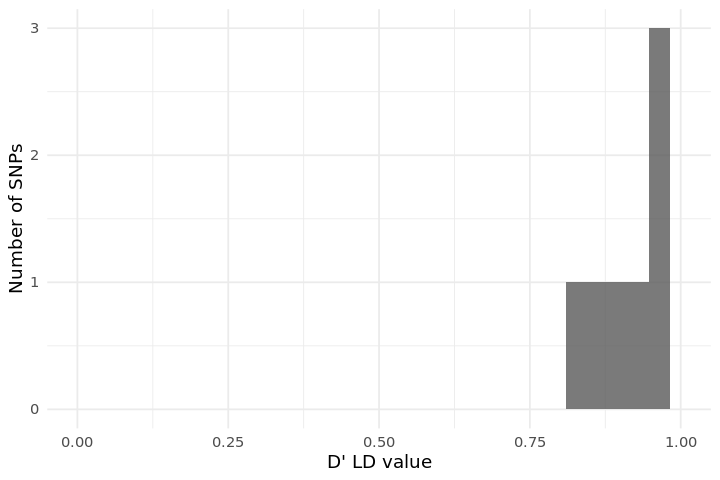

In [31]:
options(repr.plot.width=6, repr.plot.height=4)
p = ggplot(df, aes(x=d)) + geom_histogram(alpha = 0.8) + xlim(c(0,1)) +
    xlab("D' LD value") + ylab("Number of SNPs") + theme_minimal()
p

In [34]:
df$d = NA
for (i in 1:nrow(df)){
    if (i %in% c(18,38,44,58,80,91,117,120,126,139,142,149,159,164,165,169,170,171,183,186,196,201,207,219,227,230,244,245,251,258,261,262)){next}
    print(i)
    snp1 = as.character(df[i,"snp_int"])
    snp2 = as.character(df[i,"snp_assoc"])
    df[i,"d"] = as.numeric(LDpair(snp1, snp2, pop = "GBR", token = "f88ab64286ce")$d_prime)
}

[1] 1



LDlink server is working...



[1] 2



LDlink server is working...



[1] 3



LDlink server is working...



[1] 4



LDlink server is working...



[1] 5



LDlink server is working...



[1] 6



LDlink server is working...



[1] 7



LDlink server is working...



[1] 8



LDlink server is working...



[1] 9



LDlink server is working...



[1] 10



LDlink server is working...



[1] 11



LDlink server is working...



[1] 12



LDlink server is working...



[1] 13



LDlink server is working...



[1] 14



LDlink server is working...



[1] 15



LDlink server is working...



[1] 16



LDlink server is working...



[1] 17



LDlink server is working...



[1] 19



LDlink server is working...



[1] 20



LDlink server is working...



[1] 21



LDlink server is working...



[1] 22



LDlink server is working...



[1] 23



LDlink server is working...



[1] 24



LDlink server is working...



[1] 25



LDlink server is working...



[1] 26



LDlink server is working...



[1] 27



LDlink server is working...



[1] 28



LDlink server is working...



[1] 29



LDlink server is working...



[1] 30



LDlink server is working...



[1] 31



LDlink server is working...



[1] 32



LDlink server is working...



[1] 33



LDlink server is working...



[1] 34



LDlink server is working...



[1] 35



LDlink server is working...



[1] 36



LDlink server is working...



[1] 37



LDlink server is working...



[1] 39



LDlink server is working...



[1] 40



LDlink server is working...



[1] 41



LDlink server is working...



[1] 42



LDlink server is working...



[1] 43



LDlink server is working...



[1] 45



LDlink server is working...



[1] 46



LDlink server is working...



[1] 47



LDlink server is working...



[1] 48



LDlink server is working...



[1] 49



LDlink server is working...



[1] 50



LDlink server is working...



[1] 51



LDlink server is working...



[1] 52



LDlink server is working...



[1] 53



LDlink server is working...



[1] 54



LDlink server is working...



[1] 55



LDlink server is working...



[1] 56



LDlink server is working...



[1] 57



LDlink server is working...



[1] 59



LDlink server is working...



[1] 60



LDlink server is working...



[1] 61



LDlink server is working...



[1] 62



LDlink server is working...



[1] 63



LDlink server is working...



[1] 64



LDlink server is working...



[1] 65



LDlink server is working...



[1] 66



LDlink server is working...



[1] 67



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 68



LDlink server is working...



[1] 69



LDlink server is working...



[1] 70



LDlink server is working...



[1] 71



LDlink server is working...



[1] 72



LDlink server is working...



[1] 73



LDlink server is working...



[1] 74



LDlink server is working...



[1] 75



LDlink server is working...



[1] 76



LDlink server is working...



[1] 77



LDlink server is working...



[1] 78



LDlink server is working...



[1] 79



LDlink server is working...



[1] 81



LDlink server is working...



[1] 82



LDlink server is working...



[1] 83



LDlink server is working...



[1] 84



LDlink server is working...



[1] 85



LDlink server is working...



[1] 86



LDlink server is working...



[1] 87



LDlink server is working...



[1] 88



LDlink server is working...



[1] 89



LDlink server is working...



[1] 90



LDlink server is working...



[1] 92



LDlink server is working...



[1] 93



LDlink server is working...



[1] 94



LDlink server is working...



[1] 95



LDlink server is working...



[1] 96



LDlink server is working...



[1] 97



LDlink server is working...



[1] 98



LDlink server is working...



[1] 99



LDlink server is working...



[1] 100



LDlink server is working...



[1] 101



LDlink server is working...



[1] 102



LDlink server is working...



[1] 103



LDlink server is working...



[1] 104



LDlink server is working...



[1] 105



LDlink server is working...



[1] 106



LDlink server is working...



[1] 107



LDlink server is working...



[1] 108



LDlink server is working...



[1] 109



LDlink server is working...



[1] 110



LDlink server is working...



[1] 111



LDlink server is working...



[1] 112



LDlink server is working...



[1] 113



LDlink server is working...



[1] 114



LDlink server is working...



[1] 115



LDlink server is working...



[1] 116



LDlink server is working...



[1] 118



LDlink server is working...



[1] 119



LDlink server is working...



[1] 121



LDlink server is working...



[1] 122



LDlink server is working...



[1] 123



LDlink server is working...



[1] 124



LDlink server is working...



[1] 125



LDlink server is working...



[1] 127



LDlink server is working...



[1] 128



LDlink server is working...



[1] 129



LDlink server is working...



[1] 130



LDlink server is working...



[1] 131



LDlink server is working...



[1] 132



LDlink server is working...



[1] 133



LDlink server is working...



[1] 134



LDlink server is working...



[1] 135



LDlink server is working...



[1] 136



LDlink server is working...



[1] 137



LDlink server is working...



[1] 138



LDlink server is working...



[1] 140



LDlink server is working...



[1] 141



LDlink server is working...



[1] 143



LDlink server is working...



[1] 144



LDlink server is working...



[1] 145



LDlink server is working...



[1] 146



LDlink server is working...



[1] 147



LDlink server is working...



[1] 148



LDlink server is working...



[1] 150



LDlink server is working...



[1] 151



LDlink server is working...



[1] 152



LDlink server is working...



[1] 153



LDlink server is working...



[1] 154



LDlink server is working...



[1] 155



LDlink server is working...



[1] 156



LDlink server is working...



[1] 157



LDlink server is working...



[1] 158



LDlink server is working...



[1] 160



LDlink server is working...



[1] 161



LDlink server is working...



[1] 162



LDlink server is working...



[1] 163



LDlink server is working...



[1] 166



LDlink server is working...



[1] 167



LDlink server is working...



[1] 168



LDlink server is working...



[1] 172



LDlink server is working...



[1] 173



LDlink server is working...



[1] 174



LDlink server is working...



[1] 175



LDlink server is working...



[1] 176



LDlink server is working...



[1] 177



LDlink server is working...



[1] 178



LDlink server is working...



[1] 179



LDlink server is working...



[1] 180



LDlink server is working...



[1] 181



LDlink server is working...



[1] 182



LDlink server is working...



[1] 184



LDlink server is working...



[1] 185



LDlink server is working...



[1] 187



LDlink server is working...



[1] 188



LDlink server is working...



[1] 189



LDlink server is working...



[1] 190



LDlink server is working...



[1] 191



LDlink server is working...



[1] 192



LDlink server is working...



[1] 193



LDlink server is working...



[1] 194



LDlink server is working...



[1] 195



LDlink server is working...



[1] 197



LDlink server is working...



[1] 198



LDlink server is working...



[1] 199



LDlink server is working...



[1] 200



LDlink server is working...



[1] 202



LDlink server is working...



[1] 203



LDlink server is working...



[1] 204



LDlink server is working...



[1] 205



LDlink server is working...



[1] 206



LDlink server is working...



[1] 208



LDlink server is working...



[1] 209



LDlink server is working...



[1] 210



LDlink server is working...



[1] 211



LDlink server is working...



[1] 212



LDlink server is working...



[1] 213



LDlink server is working...



[1] 214



LDlink server is working...



[1] 215



LDlink server is working...



[1] 216



LDlink server is working...



[1] 217



LDlink server is working...



[1] 218



LDlink server is working...



[1] 220



LDlink server is working...



[1] 221



LDlink server is working...



[1] 222



LDlink server is working...



[1] 223



LDlink server is working...



[1] 224



LDlink server is working...



[1] 225



LDlink server is working...



[1] 226



LDlink server is working...



[1] 228



LDlink server is working...



[1] 229



LDlink server is working...



[1] 231



LDlink server is working...



[1] 232



LDlink server is working...



[1] 233



LDlink server is working...



[1] 234



LDlink server is working...



[1] 235



LDlink server is working...



[1] 236



LDlink server is working...



[1] 237



LDlink server is working...



[1] 238



LDlink server is working...



[1] 239



LDlink server is working...



[1] 240



LDlink server is working...



[1] 241



LDlink server is working...



[1] 242



LDlink server is working...



[1] 243



LDlink server is working...



[1] 246



LDlink server is working...



[1] 247



LDlink server is working...



[1] 248



LDlink server is working...



[1] 249



LDlink server is working...



[1] 250



LDlink server is working...



[1] 252



LDlink server is working...



[1] 253



LDlink server is working...



[1] 254



LDlink server is working...



[1] 255



LDlink server is working...



[1] 256



LDlink server is working...



[1] 257



LDlink server is working...



[1] 259



LDlink server is working...



[1] 260



LDlink server is working...



[1] 263



LDlink server is working...



[1] 264



LDlink server is working...



[1] 265



LDlink server is working...



[1] 266



LDlink server is working...



[1] 267



LDlink server is working...



[1] 268



LDlink server is working...



[1] 269



LDlink server is working...



[1] 270



LDlink server is working...



[1] 271



LDlink server is working...



In [38]:
head(df)

gene,snpID.a,pv_raw.a,snpID.i,pv_raw.i,snp_assoc,snp_int,d
ENSG00000184674,22_24295427_C_T,1.706834e-20,22_24312204_G_A,3.371849e-10,chr22:24295427,chr22:24312204,1.0000
ENSG00000093072,22_17680519_A_C,2.207981e-19,22_17680519_A_C,3.969373e-13,chr22:17680519,chr22:17680519,1.0000
ENSG00000196236,22_41353455_G_T,5.795798e-17,22_41256802_A_G,5.462088e-03,chr22:41353455,chr22:41256802,0.9768
ENSG00000189306,22_42896474_T_C,1.570315e-16,22_42903889_A_T,5.271792e-06,chr22:42896474,chr22:42903889,1.0000
ENSG00000100058,22_25845855_C_G,5.022552e-15,22_25866767_T_C,4.033561e-11,chr22:25845855,chr22:25866767,0.9311
ENSG00000100376,22_45807538_G_C,1.429050e-12,22_45827679_T_C,1.195027e-06,chr22:45807538,chr22:45827679,0.8764


In [39]:
write.csv(df,paste0(revision_folder,"assoc_vs_int_chr22_ld.csv"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 33 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

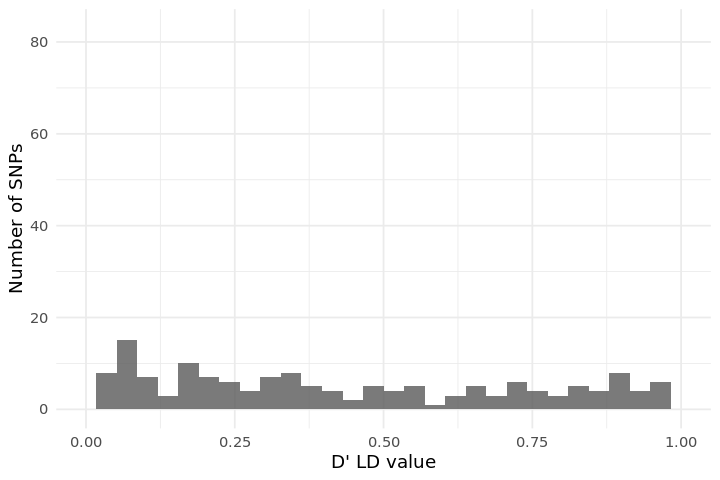

In [35]:
p = ggplot(df, aes(x=d)) + geom_histogram(alpha = 0.8) + xlim(c(0,1)) +
    xlab("D' LD value") + ylab("Number of SNPs") + theme_minimal()
p

In [36]:
cor.test(-log10(df$pv_raw.i), df$d)


	Pearson's product-moment correlation

data:  -log10(df$pv_raw.i) and df$d
t = 2.0404, df = 236, p-value = 0.04242
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.004577907 0.254562874
sample estimates:
      cor 
0.1316631 


Warning message:
“Removed 33 rows containing missing values (geom_point).”

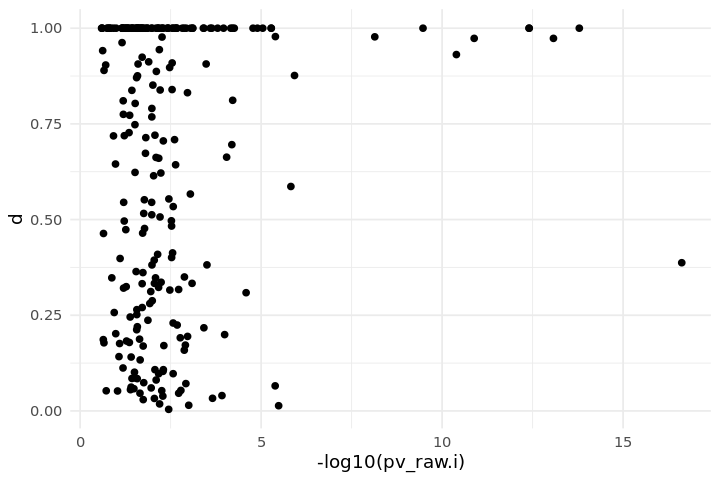

In [37]:
ggplot(df, aes(x=-log10(pv_raw.i), y = d)) + geom_point()+ theme_minimal()

In [51]:
crm_int$pos = as.numeric(t(matrix(unlist(strsplit(as.character(crm_int$snpID),"_")),ncol=nrow(crm_int),nrow=4))[,2])
crm_22$pos = as.numeric(t(matrix(unlist(strsplit(as.character(crm_22$snpID),"_")),ncol=nrow(crm_22),nrow=4))[,2])

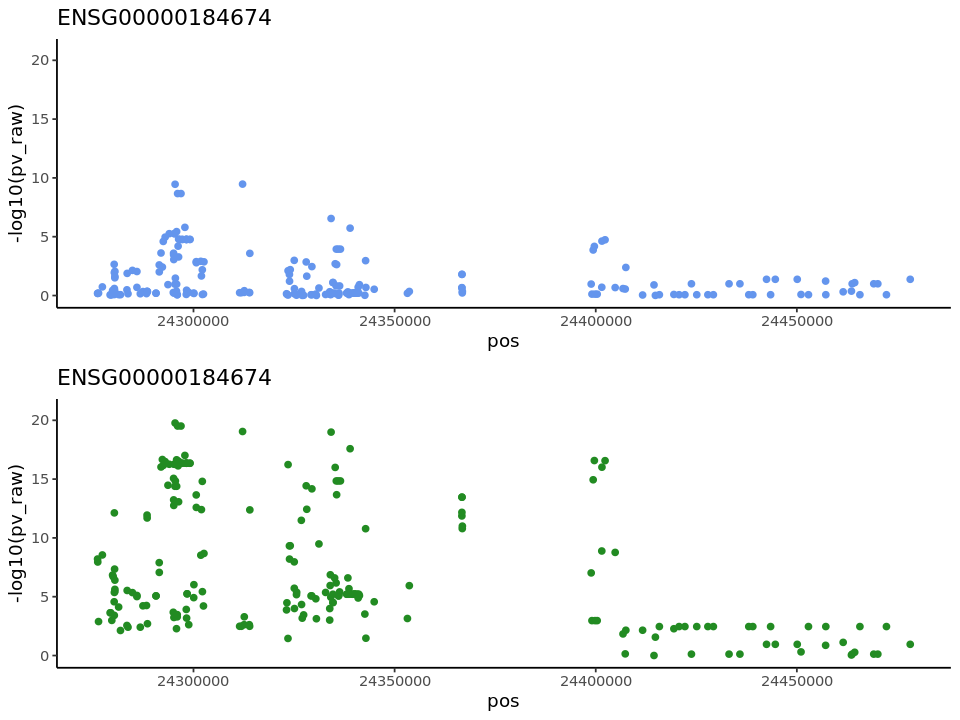

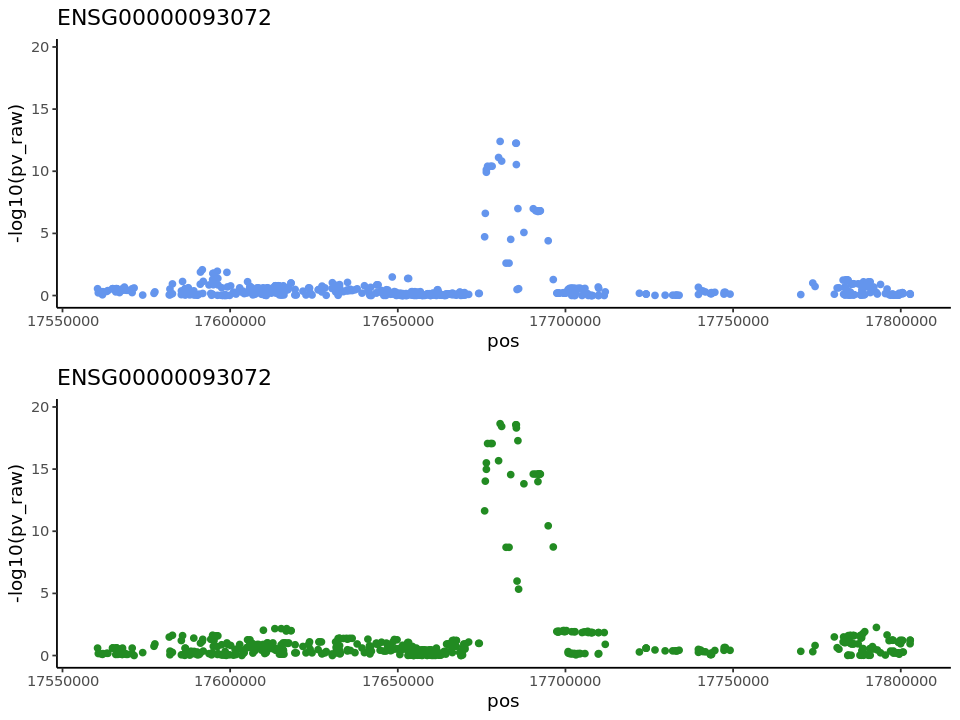

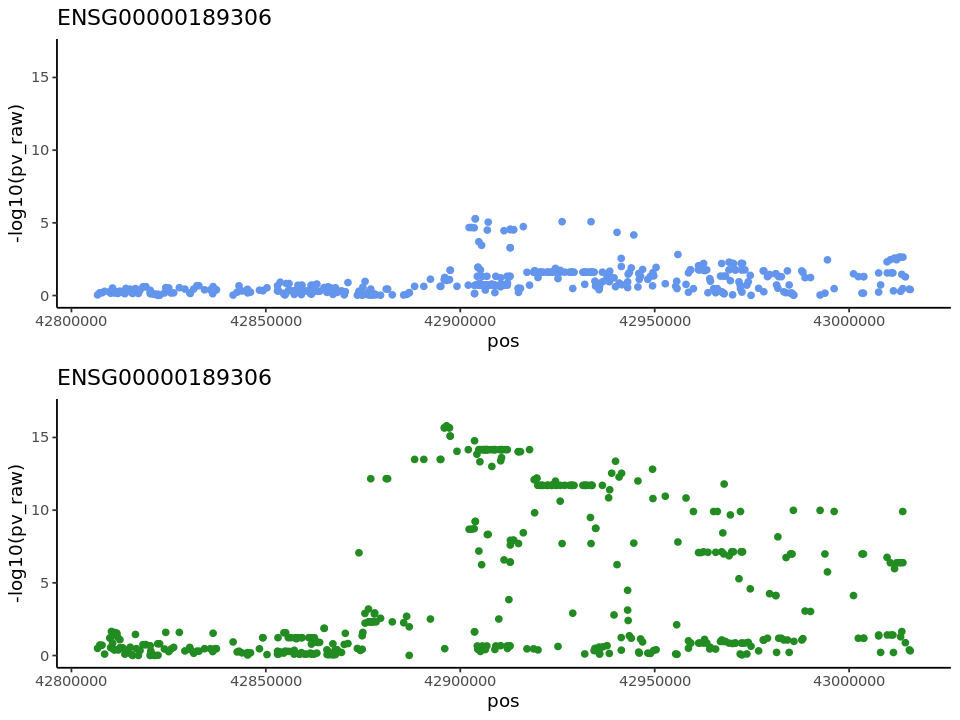

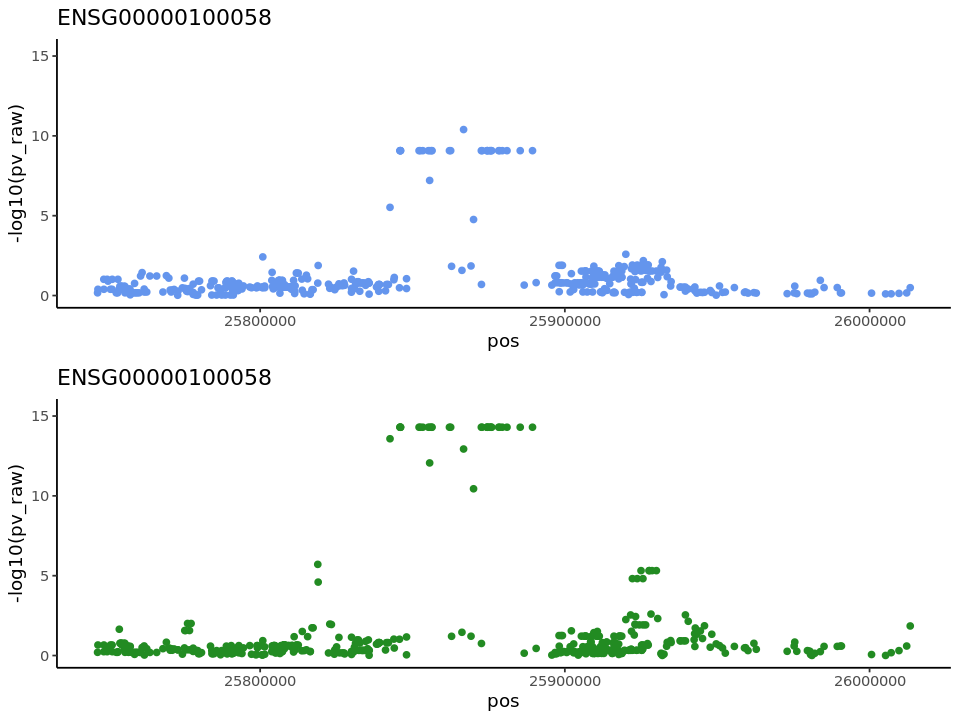

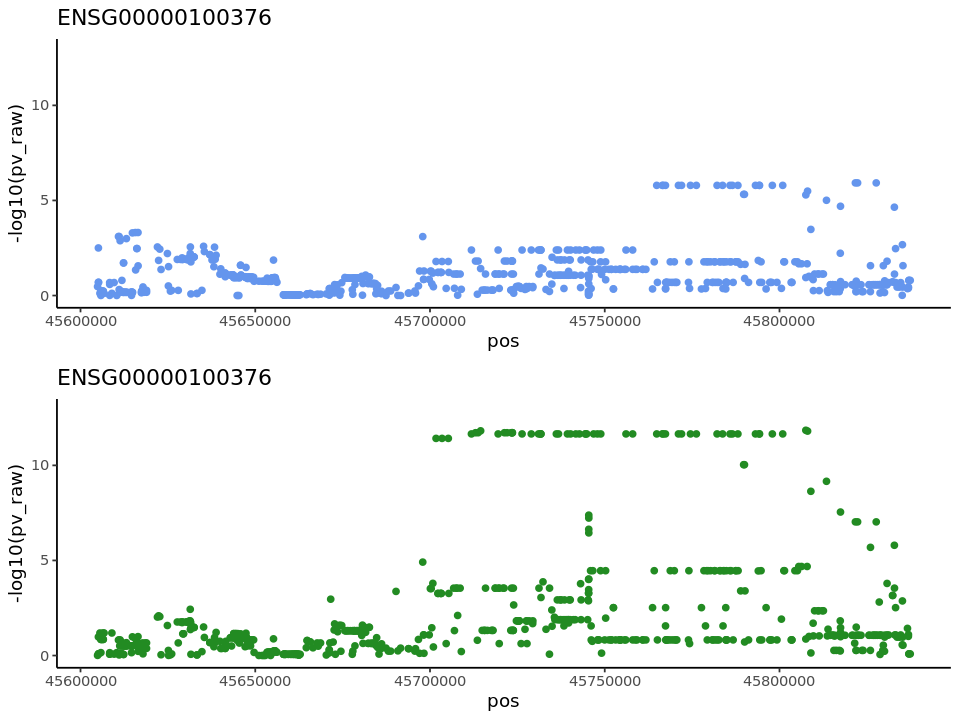

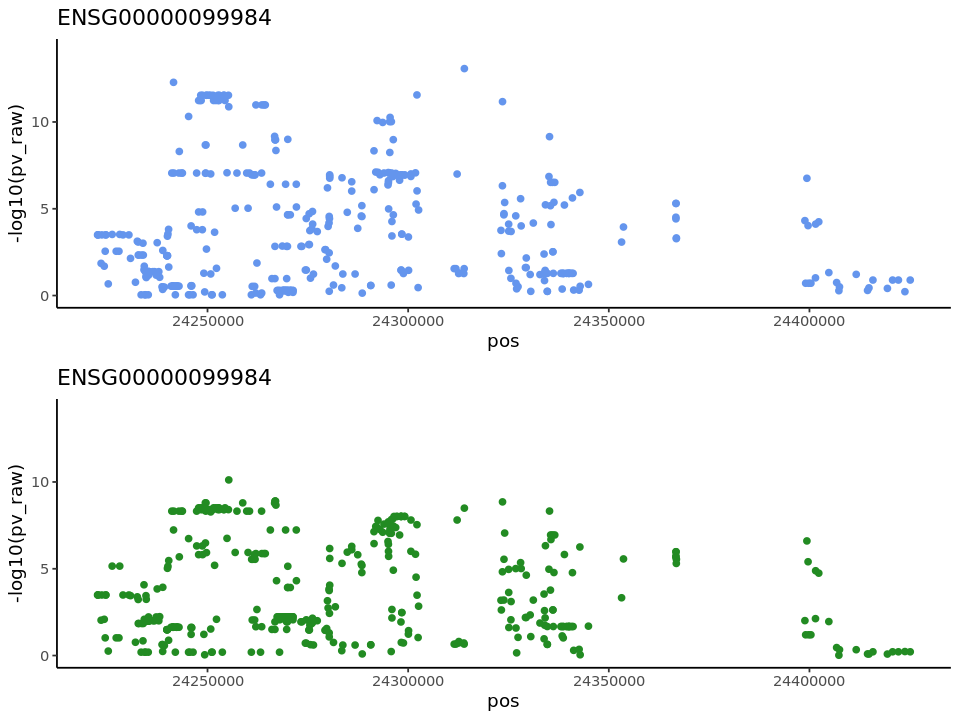

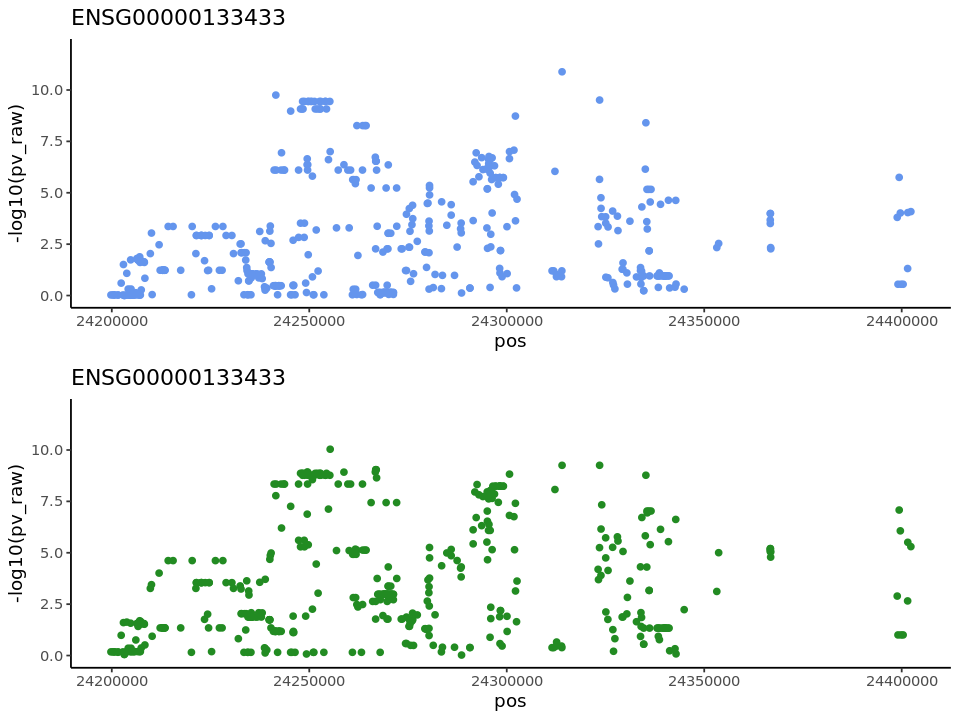

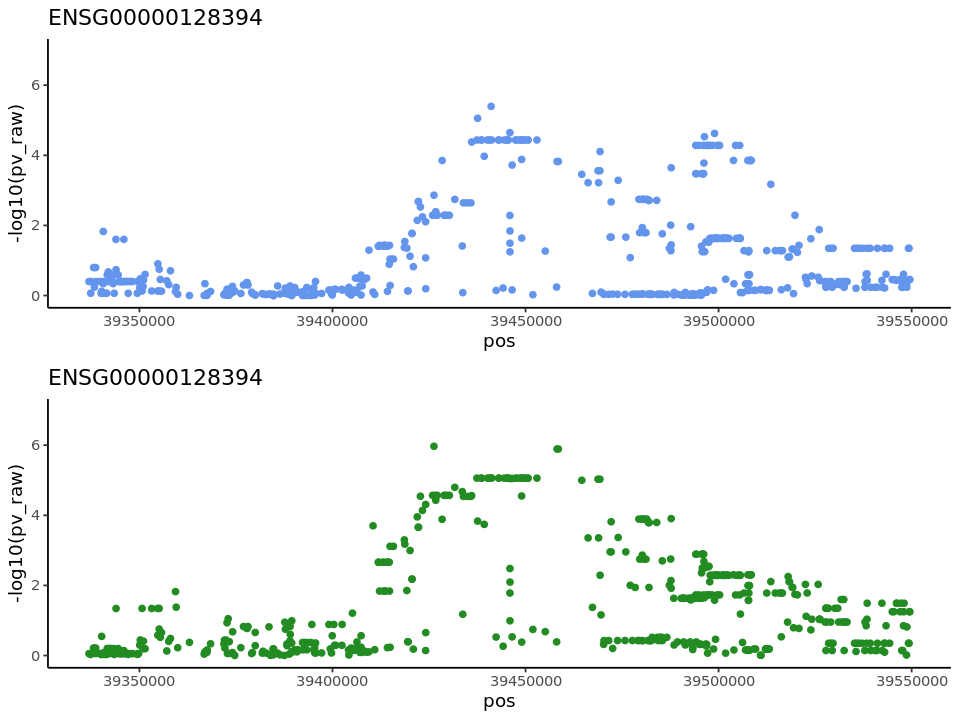

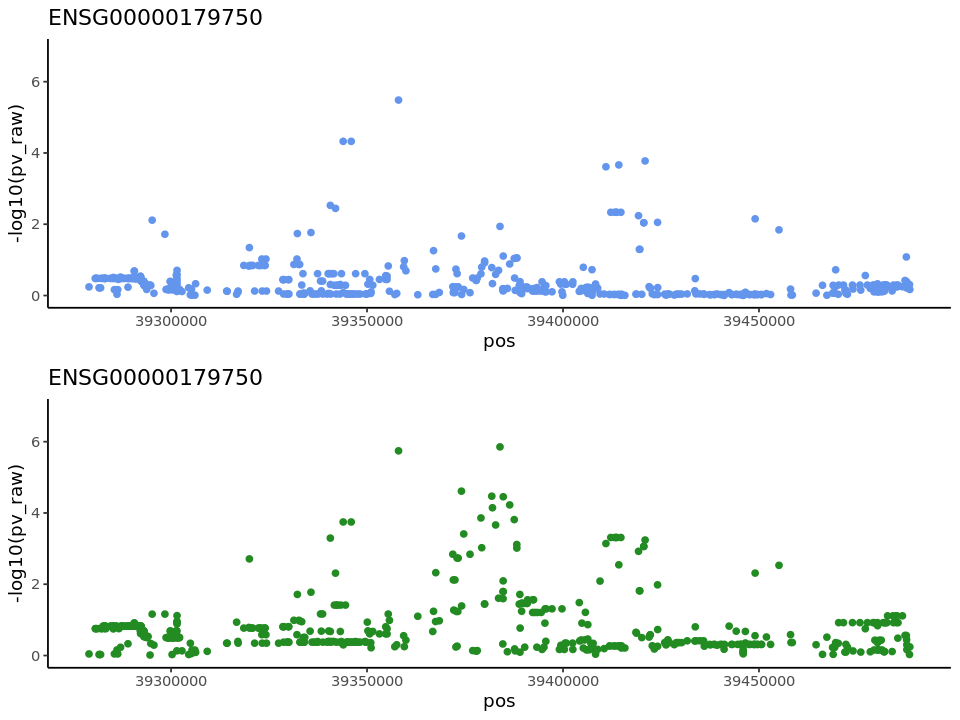

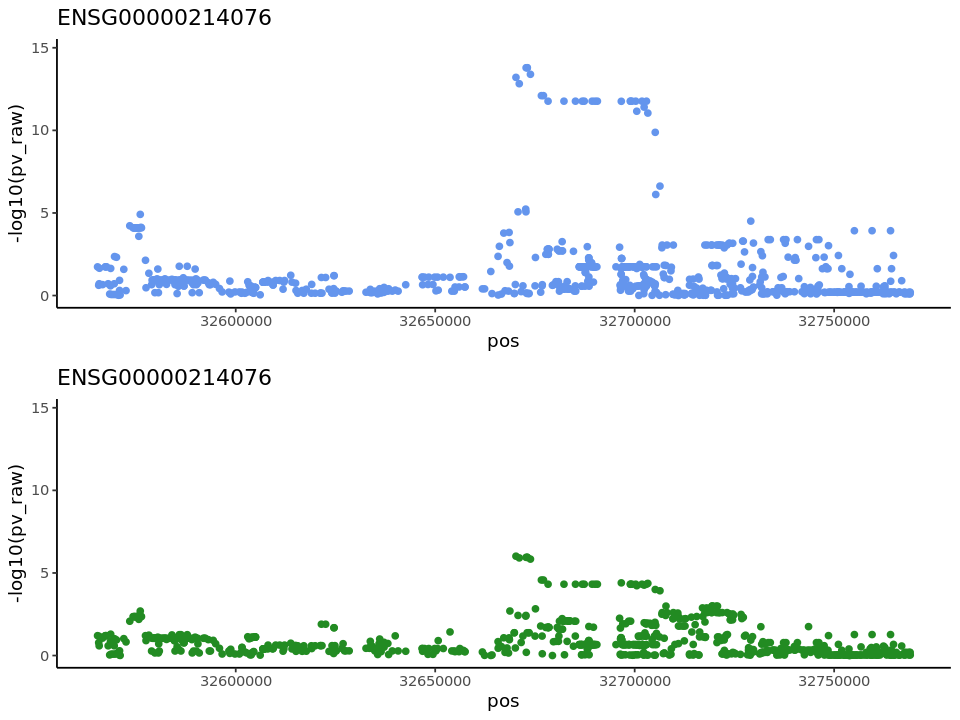

In [55]:
options(repr.plot.width = 8, repr.plot.height = 6)
for (gene in common_egenes){
    df1 = crm_int[crm_int$gene == gene,]
    p = ggplot(df1, aes(x = pos, y = -log10(pv_raw))) + geom_point(col="cornflowerblue") 
    p1 = p + theme_classic() + ggtitle(gene)
    df2 = crm_22[crm_22$gene == gene,]
    p = ggplot(df2, aes(x = pos, y = -log10(pv_raw))) + geom_point(col="forestgreen") 
    p2 = p + theme_classic() + ggtitle(gene)
    m = -log10(min(min(df1$pv_raw),min(df2$pv_raw)))+1
    p1 = p1 + ylim(c(0,m))
    p2 = p2 + ylim(c(0,m))
    print(plot_grid(p1,p2,ncol=1))
}